In [2]:
import seaborn as sns
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(
    n_samples = 1000,
    n_features = 2,
    centers = 4,
    random_state = 42
)

<Axes: >

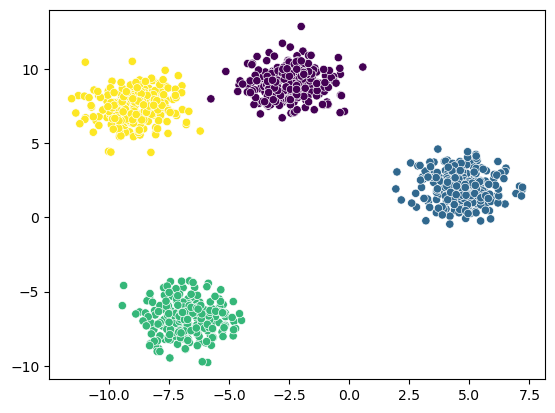

In [8]:
# visualize the data

sns.scatterplot(x=X[:, 0], y = X[:, 1], c=y)

In [10]:
# K means clustering

from sklearn.cluster import KMeans

In [11]:
K = 4

Kmeans = KMeans(
    n_clusters=4,
    random_state=42
)

In [13]:
labels = Kmeans.fit_predict(X)

In [15]:
labels

array([3, 1, 1, 2, 2, 1, 2, 1, 1, 2, 2, 3, 0, 1, 1, 1, 0, 0, 0, 2, 2, 3,
       3, 3, 2, 2, 0, 0, 1, 2, 1, 1, 1, 0, 0, 3, 1, 2, 3, 3, 2, 1, 2, 3,
       2, 3, 0, 2, 3, 2, 1, 0, 2, 3, 0, 3, 0, 0, 0, 1, 1, 0, 1, 3, 2, 0,
       1, 1, 2, 0, 3, 0, 2, 1, 2, 3, 2, 0, 2, 0, 1, 0, 0, 0, 2, 3, 1, 1,
       0, 0, 0, 0, 2, 2, 3, 2, 3, 0, 2, 1, 2, 3, 3, 0, 3, 2, 2, 0, 1, 0,
       3, 1, 2, 2, 2, 2, 1, 3, 1, 2, 0, 1, 3, 2, 3, 1, 2, 3, 1, 2, 0, 1,
       2, 3, 2, 3, 0, 1, 2, 2, 0, 0, 3, 3, 3, 2, 2, 0, 0, 0, 0, 3, 1, 1,
       0, 2, 0, 2, 2, 3, 1, 0, 2, 1, 0, 0, 2, 1, 3, 1, 2, 0, 0, 2, 0, 3,
       1, 3, 1, 3, 2, 2, 0, 1, 0, 1, 2, 3, 0, 1, 2, 0, 2, 2, 0, 3, 1, 1,
       1, 3, 0, 1, 2, 0, 2, 2, 1, 0, 2, 1, 1, 3, 1, 1, 2, 0, 1, 0, 3, 2,
       3, 3, 1, 0, 3, 0, 2, 1, 1, 0, 0, 1, 0, 3, 1, 1, 3, 1, 1, 2, 1, 3,
       1, 2, 3, 0, 2, 0, 2, 2, 2, 2, 3, 2, 2, 1, 0, 1, 1, 2, 2, 2, 3, 2,
       3, 3, 1, 2, 0, 3, 2, 0, 2, 1, 0, 3, 2, 3, 1, 2, 3, 1, 3, 2, 1, 0,
       0, 1, 0, 3, 3, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1,

<Axes: >

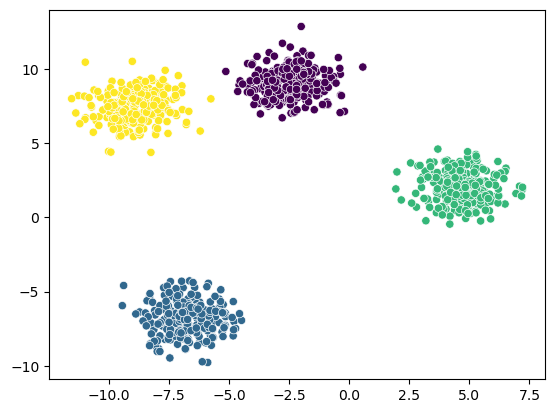

In [16]:
sns.scatterplot(x=X[:, 0], y = X[:, 1], c=labels)

How to Choose our K value Elbow and Silhouette Method

In [21]:
# Elbow Method
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit_predict(X)
    print(kmeans.inertia_);
    wcss.append(kmeans.inertia_)

66908.2849051687
31568.65686738135
7324.560564741558
1948.7329193856835
1793.3829605945277
1606.0000829405212
1430.1632633850973
1260.8913992247637
1181.4739994530687
1114.3504094379032
1007.4850271204923
934.5255257882147
815.8696142329152
805.7082277172474
762.1968996677936
702.0057860317357
649.1164019210319
624.6398040425241
620.0549377102209
574.7569742966892


<Axes: >

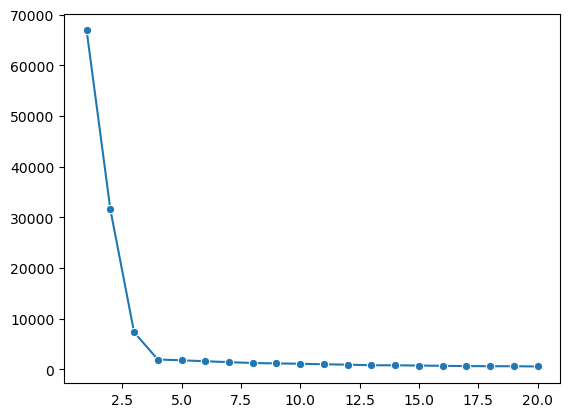

In [24]:
sns.lineplot(x=range(1,21), y=wcss, marker="o")

In [27]:
# kneed Module

!pip install kneed

In [30]:
from kneed import KneeLocator

knee = KneeLocator(range(1,21), wcss, curve="convex", direction="decreasing")
print("Optimal K value : ", knee.knee , "or", knee.elbow)

Optimal K value :  4 or 4


In [35]:
# Silhouette Score


from sklearn.metrics import silhouette_score

ss = []
for k in range(2,21):
    kmeans = KMeans(n_clusters=k)
    labels = kmeans.fit_predict(X)
    score = silhouette_score(X, labels)
    ss.append(score)

In [36]:
ss

[np.float64(0.5895787972208197),
 np.float64(0.7521964163365819),
 np.float64(0.7915983870089952),
 np.float64(0.6684919596432475),
 np.float64(0.5322658817904542),
 np.float64(0.5504472825297786),
 np.float64(0.4664274932540836),
 np.float64(0.46775061634992454),
 np.float64(0.32794975812874777),
 np.float64(0.32886835565236977),
 np.float64(0.33082376380101586),
 np.float64(0.3270627081230814),
 np.float64(0.3313267708902295),
 np.float64(0.32534502228451206),
 np.float64(0.3248706643226504),
 np.float64(0.3140579433615255),
 np.float64(0.32038109248462576),
 np.float64(0.316146154307482),
 np.float64(0.3255715175187681)]

<Axes: >

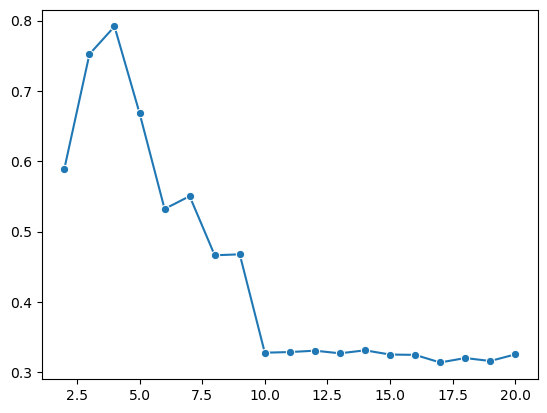

In [37]:
sns.lineplot(x=range(2,21), y = ss, marker="o")